In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.compute.use_numba=True
pd.options.compute.use_numexpr = True
pd.set_option('max_columns',None)
sns.set_style('whitegrid')

In [3]:
data = pd.read_csv('../input/titanic/train.csv',index_col='PassengerId')
display(data.head())
data.shape

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(891, 11)

In [4]:
data.drop(['Name','Ticket'],axis=1,inplace=True)

In [5]:
if data.isna().any().any():
    print(data.isna().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [6]:
# percentage of null values
for col in data.columns.values:
    print(f"Null in {col}:",(data[col].isna().values.sum() / data.shape[0]) * 100,'%')

Null in Survived: 0.0 %
Null in Pclass: 0.0 %
Null in Sex: 0.0 %
Null in Age: 19.865319865319865 %
Null in SibSp: 0.0 %
Null in Parch: 0.0 %
Null in Fare: 0.0 %
Null in Cabin: 77.10437710437711 %
Null in Embarked: 0.22446689113355783 %


In [7]:
data.drop('Cabin',axis=1,inplace=True)

In [8]:
indx = data[data.Embarked.isna()].index.values
data.drop(indx,inplace=True)

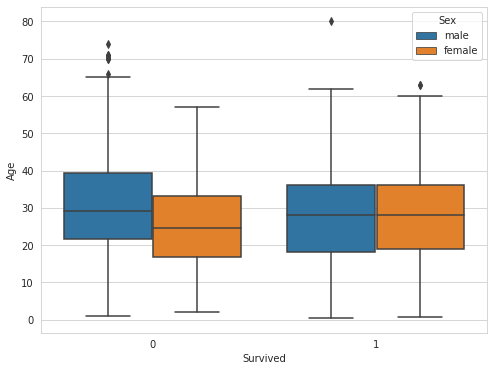

In [9]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived',y='Age',hue='Sex',data=data)
plt.show()

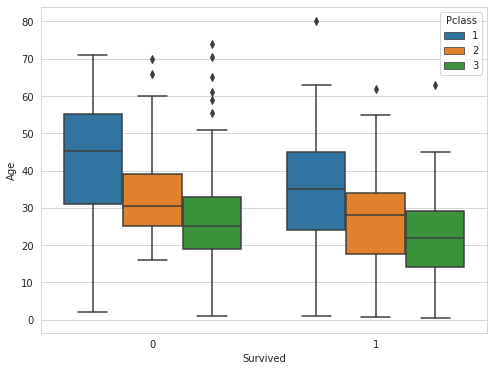

In [10]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived',y='Age',hue='Pclass',data=data)
plt.show()

In [11]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [12]:
to_impute = data[data.Age.isna()].copy()
data.dropna(inplace=True)

In [13]:
def impute_age(survived,pclass):
    if survived == 0 and pclass == 1:
        return 45
    elif survived == 0 and pclass == 2:
        return 32
    elif survived == 0 and pclass == 3:
        return 27
    elif  survived == 1 and pclass == 1:
        return 36
    elif survived == 1 and pclass == 2:
        return 28
    elif survived == 1 and pclass == 3:
        return 23
    
imp_age_vect = np.vectorize(impute_age)
ages = imp_age_vect(to_impute.Survived.values,to_impute.Pclass.values)

In [14]:
to_impute['Age'] = ages

In [15]:
data = pd.concat([data,to_impute])

In [16]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [17]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [18]:
data[['Survived','Pclass','Age','SibSp','Parch']] = data[['Survived','Pclass','Age','SibSp','Parch']].astype(np.int8)
data[['Sex','Embarked']] = data[['Sex','Embarked']].astype('category')
data['Fare'] = data['Fare'].astype(np.int32)

In [19]:
data.dtypes

Survived        int8
Pclass          int8
Sex         category
Age             int8
SibSp           int8
Parch           int8
Fare           int32
Embarked    category
dtype: object

In [20]:
data.sort_index()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22,1,0,7,S
2,1,1,female,38,1,0,71,C
3,1,3,female,26,0,0,7,S
4,1,1,female,35,1,0,53,S
5,0,3,male,35,0,0,8,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27,0,0,13,S
888,1,1,female,19,0,0,30,S
889,0,3,female,27,1,2,23,S


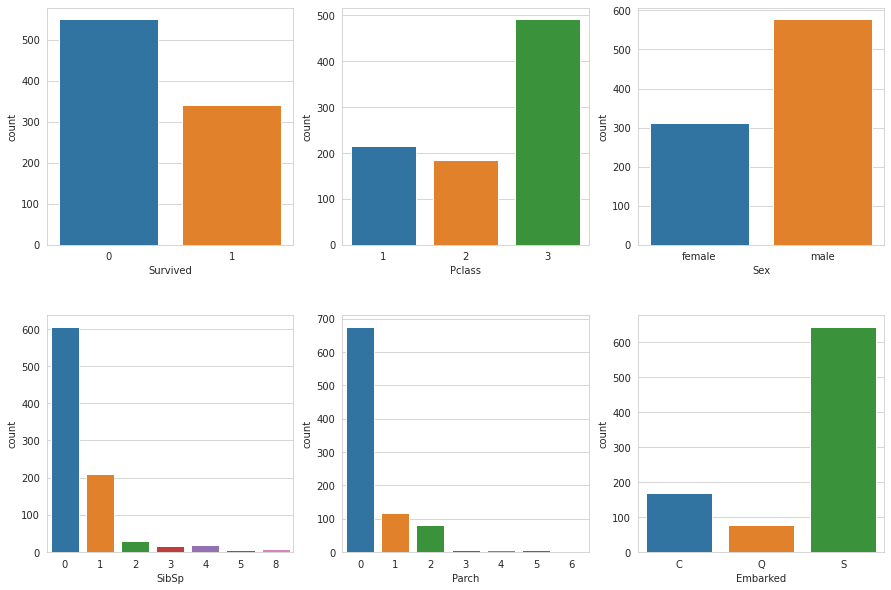

In [21]:
fig,ax1 = plt.subplots(2,3,figsize=(15,10),gridspec_kw={'hspace':0.3,'wspace':0.2})
row,col = 0,0
for x in ['Survived','Pclass','Sex','SibSp','Parch','Embarked']:
    if col == 3:
        col = 0
        row = row + 1
    sns.countplot(x=x,data=data,ax=ax1[row,col])
    col += 1        

<AxesSubplot:xlabel='Sex', ylabel='count'>

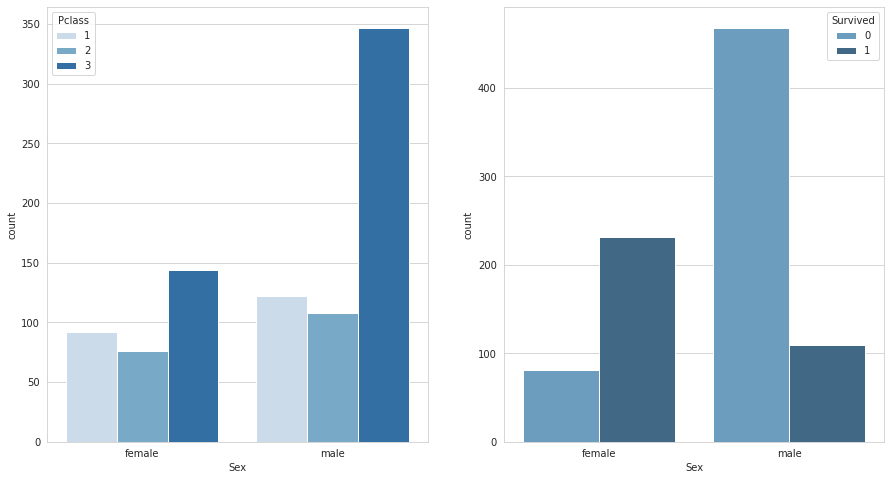

In [22]:
fig,ax1 = plt.subplots(1,2,figsize=(15,8),gridspec_kw={'hspace':0.3,'wspace':0.2})
#sns.barplot(x='Sex',y='Survived',ax=[0,0])
sns.countplot(x='Sex',hue='Pclass',data=data,ax=ax1[0],palette='Blues')
sns.countplot(x='Sex',hue='Survived',data=data,ax=ax1[1],palette='Blues_d')

In [23]:
data['Alone'] = (data['SibSp'].values + data['Parch'].values == 0) * 1
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Alone
PassengerId,,,,,,,,,
1,0,3,male,22,1,0,7,S,0
2,1,1,female,38,1,0,71,C,0
3,1,3,female,26,0,0,7,S,1
4,1,1,female,35,1,0,53,S,0
5,0,3,male,35,0,0,8,S,1


In [24]:
from sklearn.model_selection import train_test_split
X = data.drop('Survived', axis=1)
y = data.Survived

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

In [25]:
X_train = pd.get_dummies(X_train,drop_first=True)
X_train

,Pclass,Age,SibSp,Parch,Fare,Alone,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
633,1,32,0,0,30,1,1,0,0
126,3,12,1,0,11,0,1,0,0
374,1,22,0,0,135,1,1,0,0
848,3,35,0,0,7,1,1,0,0
118,2,29,1,0,21,0,1,0,1
...,...,...,...,...,...,...,...,...,...
822,3,27,0,0,8,1,1,0,1
208,3,26,0,0,18,1,1,0,0
114,3,20,1,0,9,0,0,0,1


In [26]:
X_test = pd.get_dummies(X_test,drop_first=True)
X_test

,Pclass,Age,SibSp,Parch,Fare,Alone,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
338,1,41,0,0,134,1,0,0,0
406,2,34,1,0,21,0,1,0,1
436,1,14,1,2,120,0,0,0,1
407,3,51,0,0,7,1,1,0,1
711,1,24,0,0,49,1,0,0,0
...,...,...,...,...,...,...,...,...,...
771,3,24,0,0,9,1,1,0,1
35,1,28,1,0,82,0,1,0,0
404,3,28,1,0,15,0,1,0,1


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

params = {
    'max_depth' : [7,12,16,20],
    'n_estimators' : [120,135,150,175]
}
rfc = RandomForestClassifier()
rscv = RandomizedSearchCV(rfc,params,cv=10,n_jobs=-1)
rscv.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [7, 12, 16, 20],
                                        'n_estimators': [120, 135, 150, 175]})

In [31]:
rf_pred = rscv.predict(X_test)
rf_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0], dtype=int8)

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

print((classification_report(y_test,rf_pred)))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       120
           1       0.85      0.76      0.80        58

    accuracy                           0.88       178
   macro avg       0.87      0.85      0.86       178
weighted avg       0.87      0.88      0.87       178



In [33]:
confusion_matrix(y_test,rf_pred)

array([[112,   8],
       [ 14,  44]])